# **Students Performance Analysis Using Hypothesis Testing**

-----
## **Problem Statement**

The education board aims to understand whether attending a **test preparation course** has a measurable impact on **student performance in exams**.  
Specifically, the goal is to investigate whether there is a **statistically significant difference in math scores** between students who **completed the test preparation course** and those who **did not**.  

This analysis will help determine the **effectiveness of such courses** and support decisions around **implementing or improving preparatory programs** in the curriculum.

------

### **PART A — Let's check if it's Parametric or Non-Parametric**

### **Step 1: Import required libraries**

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, mannwhitneyu, probplot

### **Step 2: Load the dataset**

In [15]:
student_df = pd.read_csv("StudentsPerformance.csv")

In [17]:
# Create a copy of the dataset
df = student_df.copy()

In [19]:
# View structure of dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [21]:
print("\n Summary statistics (describe):")
print(df.describe())


 Summary statistics (describe):
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


### **Step 3: Data Cleaning (before any analysis)**

In [23]:
# 1. Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [25]:
# 2. Check data types to ensure correctness
print("\nData types:\n", df.dtypes)


Data types:
 gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


In [57]:
# 3. Remove or handle duplicate rows if any
df = df.drop_duplicates()

In [59]:
# 4. Validate the categories in the grouping variable
print("\nUnique values in 'test preparation course':", df['test preparation course'].unique())


Unique values in 'test preparation course': ['none' 'completed']


In [67]:
# 5. Strip whitespace or standardize text if needed
df['test preparation course'] = df['test preparation course'].str.strip().str.lower()

In [106]:
#Frequency counts for categorical variables
print("\n Value counts for 'gender':")
print(df['gender'].value_counts())

print("\n Value counts for 'test preparation course':")
print(df['test preparation course'].value_counts())

print("\n Value counts for 'race/ethnicity':")
print(df['race/ethnicity'].value_counts())

print("\n Value counts for 'parental level of education':")
print(df['parental level of education'].value_counts())


 Value counts for 'gender':
gender
female    518
male      482
Name: count, dtype: int64

 Value counts for 'test preparation course':
test preparation course
none         642
completed    358
Name: count, dtype: int64

 Value counts for 'race/ethnicity':
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

 Value counts for 'parental level of education':
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


### **Step 4: Select Variables**

We select two numeric variables and one categorical grouping variable:
- **Numeric:** 'math score', 'reading score'
- **Categorical:** 'test preparation course'

### **Step 5: Exploratory Data Analysis (EDA) – Visualizing Relationships and Distributions**

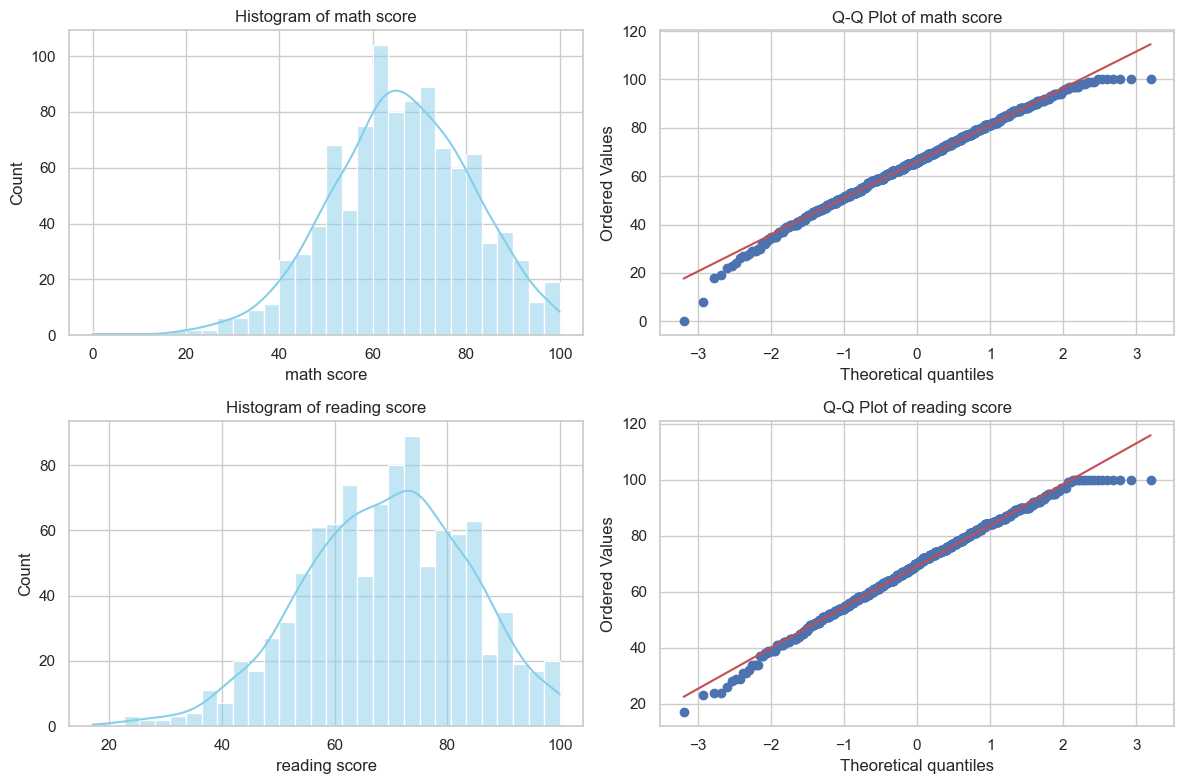

In [71]:
# Check distribution using histogram and Q-Q plots

# Visual inspection to check normality
numeric_vars = ['math score', 'reading score']
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

for i, col in enumerate(numeric_vars):
    # Histogram plot with KDE
    plt.subplot(2, 2, 2*i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {col}')
    
    # Q-Q plot to check normality visually
    plt.subplot(2, 2, 2*i + 2)
    probplot(df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}')

plt.tight_layout()
plt.show()

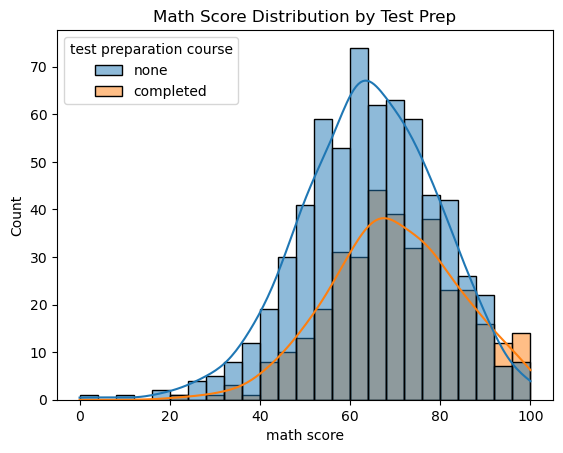

In [15]:
# Histograms 
sns.histplot(data=df, x="math score", hue="test preparation course", kde=True)
plt.title("Math Score Distribution by Test Prep")
plt.show()

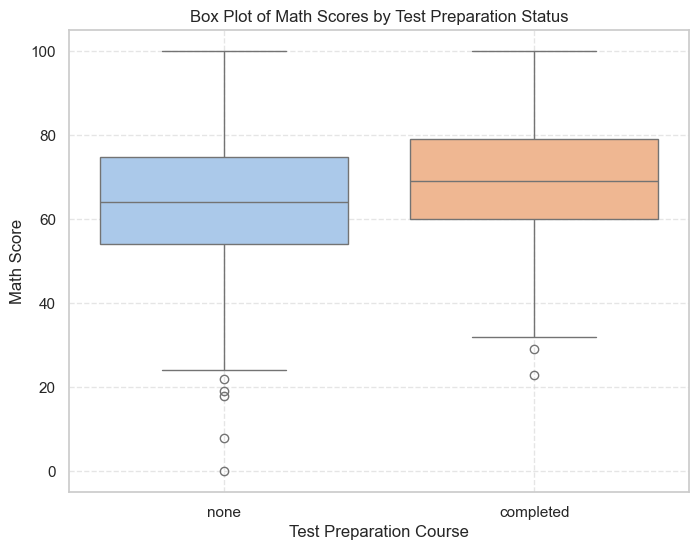

In [92]:
# BOX PLOT: Math Score vs Test Preparation Course

plt.figure(figsize=(8, 6))
sns.boxplot(
    x='test preparation course', 
    y='math score', 
    hue='test preparation course',  # Add hue
    data=df, 
    palette='pastel',
    dodge=False
)
plt.title('Box Plot of Math Scores by Test Preparation Status')
plt.xlabel('Test Preparation Course')
plt.ylabel('Math Score')
plt.legend([],[], frameon=False)  # Remove extra legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

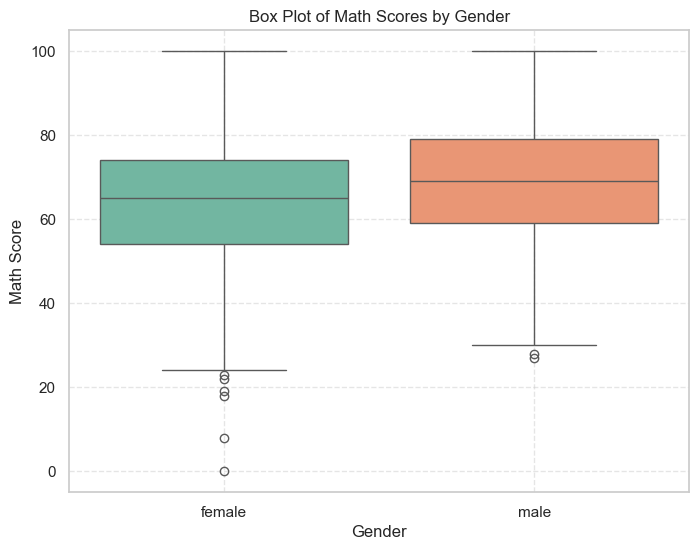

In [98]:
# Box Plot: Math Score by Gender

plt.figure(figsize=(8, 6))
sns.boxplot(
    x='gender',
    y='math score',
    hue='gender',  # Required to match palette
    data=df,
    palette='Set2',
    dodge=False  # Prevents double bars
)
plt.title('Box Plot of Math Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Math Score')
plt.legend([], [], frameon=False)  # Hide extra legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

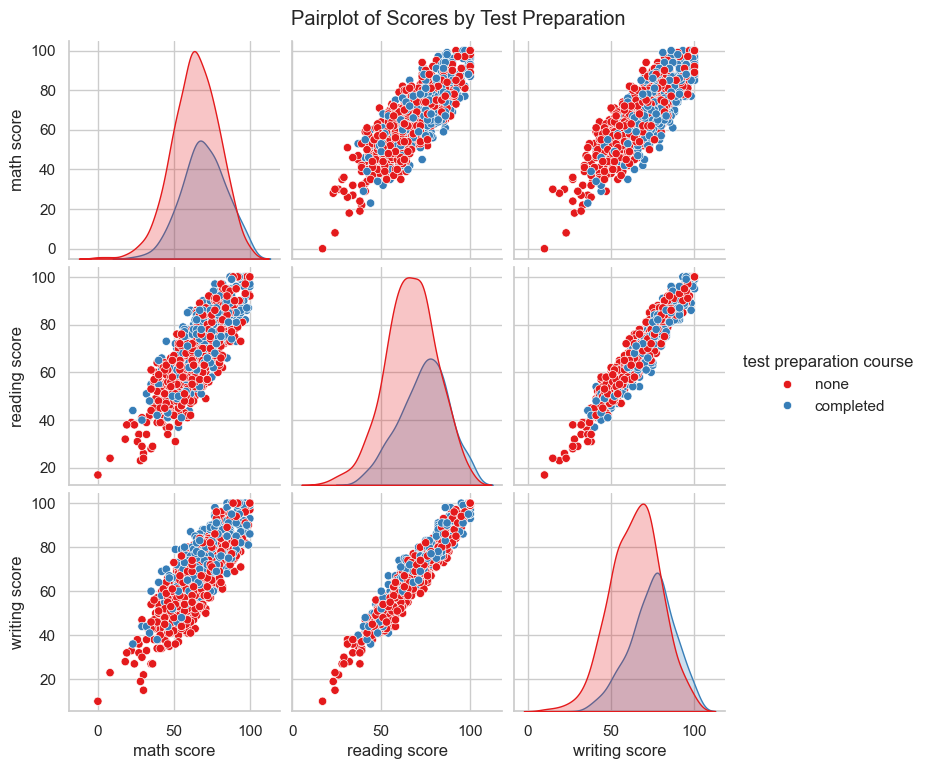

In [100]:
# Pairplot of scores with hue = test preparation

sns.pairplot(df, vars=['math score', 'reading score', 'writing score'], hue='test preparation course', palette='Set1')
plt.suptitle('Pairplot of Scores by Test Preparation', y=1.02)
plt.show()

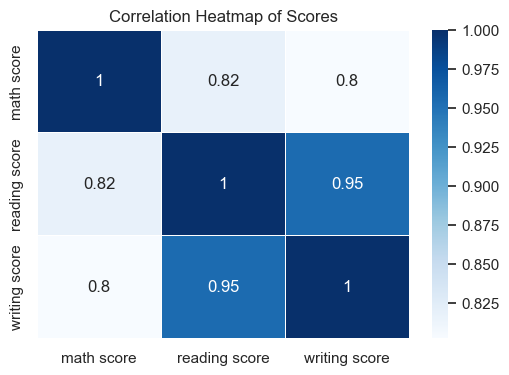

In [102]:
# Correlation Heatmap

plt.figure(figsize=(6, 4))
sns.heatmap(df[['math score', 'reading score', 'writing score']].corr(), annot=True, cmap='Blues', linewidths=0.5)
plt.title('Correlation Heatmap of Scores')
plt.show()

### **Step 6: Statistical normality check using Shapiro-Wilk Test**

In [72]:
# If p-value < 0.05, data is NOT normally distributed

shapiro_results = {col: shapiro(df[col]) for col in numeric_vars}

for col, result in shapiro_results.items():
    print(f"{col} - W={result.statistic:.4f}, p-value={result.pvalue:.5f}")

math score - W=0.9932, p-value=0.00015
reading score - W=0.9929, p-value=0.00011


## **PART B — Hypothesis Test**

### **Hypothesis:**
- H₀: There is no difference in math scores between students who completed and did not complete test preparation.
- H₁: There is a difference in math scores between the two groups.

### **Step 7: Split the data into two groups based on the test preparation course**

In [77]:
group_completed = df[df['test preparation course'] == 'completed']['math score']
group_none = df[df['test preparation course'] == 'none']['math score']

### **Step 8: Using Mann-Whitney U Test (non-parametric)**

In [79]:
# Since data is not normally distributed, we use Mann-Whitney U Test (non-parametric)
u_statistic, p_value = mannwhitneyu(group_completed, group_none, alternative='two-sided')

### **Step 9: Display the results**

In [81]:
print("\nMann-Whitney U Test Result:")
print(f"U statistic = {u_statistic}")
print(f"p-value = {p_value:.10f}")


Mann-Whitney U Test Result:
U statistic = 138412.0
p-value = 0.0000000802


### **Step 10: Interpretation**

In [83]:
if p_value < 0.05:
    print("Conclusion: Reject H₀. There is a statistically significant difference in math scores based on test preparation.")
else:
    print("Conclusion: Fail to reject H₀. There is no significant difference in math scores based on test preparation.")

Conclusion: Reject H₀. There is a statistically significant difference in math scores based on test preparation.


----
## **Key Insights & Outcomes**

1. **Students who completed the test preparation course** scored significantly higher in math than those who did not, indicating a **positive impact of test preparation**.

2. There is a **statistically significant difference** in performance between the two student groups (*Completed* and *None*) based on test preparation status.

3. **Math and reading scores are not normally distributed**, suggesting that student performance data may often be **skewed or unevenly spread**.

4. The **difference in math scores** between groups (*Completed* and *None*) is **not due to random chance**, but reflects a **real, measurable effect**.

5. The analysis supports the **importance of preparation and study support programs** in improving academic outcomes.

6. **Gender-based box plots** indicate that **boys and girls may show slight differences** in math scores.

7. Students who perform well in one subject (like reading) often do well in others (like writing or math), showing a **strong correlation between skills**.

8. **Visualizations such as box plots** clearly revealed the score differences between groups and helped in understanding the data better.

9. There may be **underlying variability** in how students perform across subjects, influenced by **factors like preparation, effort, or access to resources**.